Problem 1

In [32]:
import numpy as np

def newton(f, x_0, f_prime, stop_tol = 10 ** -5, max_iter = 15):
    x_t = x_0
    for i in range(max_iter):  
        x_t1 = x_t - ( f(x_t) / f_prime(x_t) )
        print(x_t1)
        if (abs(x_t1 - x_t) < stop_tol):
            print("woohoo")
            return x_t1
        x_t = x_t1
    print("Convergence Failed")
    return None
    
f = lambda x: np.exp(x) - 2
df = lambda x: np.exp(x)
print(newton(f, 2, df))
f = lambda x: (x ** 4) - 3 
df = lambda x: 4 * (x ** 3)
print(newton(f, 2, df))

1.2706705664732254
0.8319573037399686
0.7023505840171669
0.6931894022505122
0.6931471814512683
0.6931471805599453
woohoo
0.6931471805599453
1.59375
1.3805806095506252
1.3204558637587656
1.3160957760892447
1.3160740134923037
1.3160740129524924
woohoo
1.3160740129524924


Problem 3

In [36]:
def newton3(f, x_0, f_prime, alpha = 1, stop_tol = 10 ** -5, max_iter = 15):
    x_t = x_0
    for i in range(max_iter):  
        x_t1 = x_t - alpha * ( f(x_t) / f_prime(x_t) )
        print(x_t1)
        if (abs(x_t1 - x_t) < stop_tol):
            print("woohoo")
            return x_t1
            break
        x_t = x_t1
    print("Convergence Failed")
    return None
    
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3) 
df =  lambda x: (1/3) * np.power(np.abs(x), (-2./3))
newton3(f, .01, df, 1)
newton3(f, .01, df, .4)


-0.02000000000000001
0.04000000000000004
-0.08000000000000013
0.16000000000000028
-0.3200000000000006
0.6400000000000013
-1.280000000000003
2.560000000000006
-5.1200000000000125
10.240000000000023
-20.480000000000047
40.96000000000008
-81.92000000000013
163.84000000000023
-327.6800000000003
Convergence Failed
-0.0020000000000000035
0.0004000000000000019
-8.000000000000059e-05
1.6000000000000186e-05
-3.2000000000000507e-06
6.400000000000134e-07
woohoo
0.003999999999999998
0.0015999999999999986
0.0006399999999999991
0.00025599999999999945
0.0001023999999999997
4.095999999999984e-05
1.638399999999992e-05
6.5535999999999604e-06
woohoo


6.5535999999999604e-06

0.3261261261261262

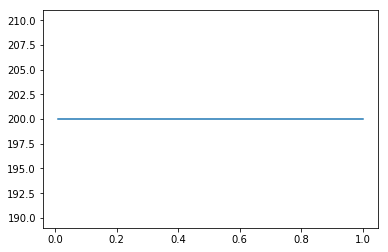

In [53]:
def newton4(f, x_0, f_prime, alpha = 1, stop_tol = 10 ** -5, max_iter = 300):
    x_t = x_0
    x_t1 = x_t * 2
    itera = 0 
    while (abs(x_t1 - x_t) > stop_tol):
        itera += 1
        x_t = x_t1
        x_t1 = x_t - alpha * ( f(x_t) / f_prime(x_t) )
        if (itera > 500): return None 
    return (x_t1, itera)

from matplotlib import pyplot as plt 

def min_iter(f, x_0, f_prime, stop_tol = 10 ** -5, max_iter = 300):
    alpha = np.linspace(.01, 1, 1000)
    iters = np.zeros_like(alpha)
    best = [0, 10000]
    for i, a in enumerate(alpha):
        tmp = newton4(f, x_0, f_prime, a, stop_tol, max_iter)
        if tmp:
            iters[i] = tmp[1]
        else:
            iters[i] = 10000
        if (tmp and tmp[1] < best[1]):
            best[0] = a
            best[1] = tmp[1]
    iters[iters[i] > 200] = 200   
    plt.plot(alpha, iters)
    return best[0]

f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3) 
df =  lambda x: (1/3) * np.power(np.abs(x), (-2./3))
min_iter(f, .01, df)
